In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator


# Model
This is the large version of the model, there is also a huge version which should be more accurate, but I just chose the large version because I didn't want to wait forever for inference

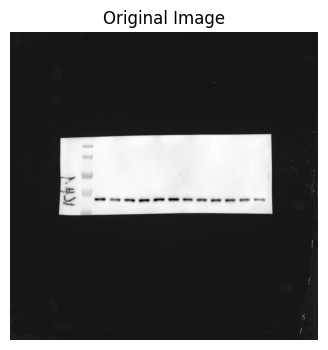

In [22]:
# Load the SAM Model
sam_checkpoint = "sam_vit_l_0b3195.pth"
model_type = "vit_l"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)

local_image_path = "1.jpeg"
image_bgr = cv2.imread(local_image_path)
image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,4))
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()


# Segment anything model
The model performs quite well after tweaking some of the hyperparameters considering there is no ground truth or any other inductive bias given to the model. I could make the model more accurate like giving it
a ROI like the other notebook, but I wanted this model to be as general as possible

Found 19 contours


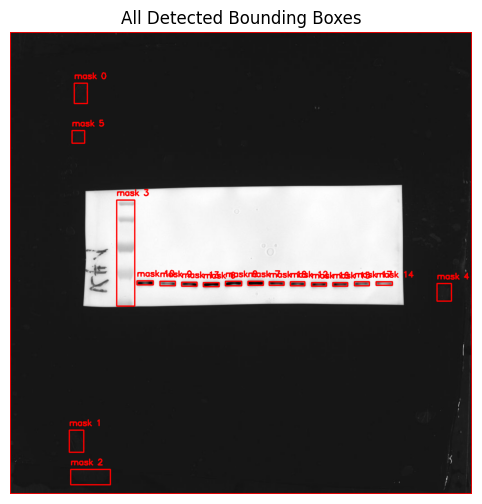

Bounding Boxes: [[142, 113, 29, 45], [131, 882, 32, 49], [134, 969, 88, 34], [236, 372, 40, 235], [946, 557, 32, 39], [137, 218, 28, 28], [428, 555, 35, 9], [527, 552, 34, 9], [477, 552, 36, 10], [332, 552, 34, 10], [281, 551, 36, 9], [0, 0, 1023, 1023], [621, 553, 32, 9], [380, 554, 34, 9], [811, 553, 36, 8], [715, 555, 33, 8], [668, 555, 33, 8], [763, 553, 33, 9], [574, 553, 33, 8]]


In [25]:

mask_generator = SamAutomaticMaskGenerator(
    model=sam,
    pred_iou_thresh=0.94,         # filter out proposals with lower IoU confidence
    stability_score_thresh=0.95,  # remove unstable masks
    min_mask_region_area=300,
    box_nms_thresh=0.05           # stricter NMS to suppress overlap
)

# generate all masks
masks = mask_generator.generate(image)
print(f"Found {len(masks)} contours")

# draw and label bounding boxes
image_with_boxes = image.copy()
boxes = []
for i, m in enumerate(masks):
    x, y, w, h = m["bbox"]
    boxes.append([x, y, w, h])
    cv2.rectangle(
        image_with_boxes, 
        (x, y), (x + w, y + h), 
        (255, 0, 0), 
        2
    )
    cv2.putText(
        image_with_boxes,
        f"mask {i}",
        (x, y - 10),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.6,
        (255, 0, 0),
        2
    )

plt.figure(figsize=(10,6))
plt.imshow(image_with_boxes)
plt.title("All Detected Bounding Boxes")
plt.axis("off")
plt.show()

print("Bounding Boxes:", boxes)